In [1]:
import psycopg2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
from tabulate import tabulate
import schedule
import time
from datetime import date, timedelta
import win32com.client as win32
import teradatasql
import openpyxl
import matplotlib.pyplot as plt
import telebot
import logging
import types


c:\Users\vitaly.flerin\Miniconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\vitaly.flerin\Miniconda3\lib\site-packages\numpy\.libs\libopenblas.4SP5SUA7CBGXUEOC35YP2ASOICYYEQZZ.gfortran-win_amd64.dll
c:\Users\vitaly.flerin\Miniconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
user=input()
password=input()
query = ''' SELECT * FROM uat_ca.mc_logs WHERE CAST(logdate AS DATE) = CURRENT_DATE;'''#and processname = 'nps_187
with teradatasql.connect(host="td2800.corp.tele2.ru", user=user, password=password,logmech="ldap", tmode="TERA" ) as connect:
    df1 = pd.read_sql(query, connect)

C:\Users\vitaly.flerin\AppData\Local\Temp\ipykernel_14672\3819710874.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df1 = pd.read_sql(query, connect)


In [3]:
df1

,logdate,processtype,processname,logcomment,logtype,sid,loadid
0,2023-07-10 06:05:55.340,PROCEDURE IN RUN,nps_190,Строк по долетам: 0,NaN,118236241,15355
1,2023-07-10 06:20:04.390,PROCEDURE IN RUN,nps_detail,START: nps_detail,0.0,118236241,15358
2,2023-07-10 12:29:58.400,PROCEDURE IN RUN,mon_soa_cuvo,END: 417,1.0,118272823,15382
3,2023-07-10 06:49:15.890,PROCEDURE IN RUN,nps_473_as,INTERVAL_DATE 03.07.2023_10.07.2023 Всего стро...,NaN,118236392,15369
4,2023-07-10 05:56:38.520,PROCEDURE IN RUN,nps_mi_2022,Строк по долетам: 141 fin - 0,NaN,118236241,15352
...,...,...,...,...,...,...,...
144,2023-07-10 06:29:00.660,PROCEDURE IN RUN,nps_step0,START,0.0,118242470,15362
145,2023-07-10 06:52:44.780,PROCEDURE IN RUN,nps_187,INTERVAL_DATE 03.07.2023_10.07.2023 Всего стро...,NaN,118245673,15370
146,2023-07-10 12:28:14.060,PROCEDURE IN RUN,mon_soa_cuvo,Рассчитано дней: 185 - 1,NaN,118272823,15381
147,2023-07-10 06:12:12.970,PROCEDURE IN RUN,nps_188,Строк без долетов: 1030,NaN,118236392,15356


In [6]:
user=input('Введите имя юзера')
password=input()
query = '''select * from uat_ca.vf_for_tg_test'''
with teradatasql.connect(host="td2800.corp.tele2.ru", user=user, password=password,logmech="ldap", tmode="TERA" ) as connect:
    df = pd.read_sql(query, connect)

C:\Users\vitaly.flerin\AppData\Local\Temp\ipykernel_14672\2650851830.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connect)


подготовка

In [7]:
token = '5859647042:AAE0VTK8RlKrhFx7Mv9HeJS3tFK7aZ_J4W4'
your_chat_id = '322276469'
chat_id = '322276469'
bot = telebot.TeleBot(token)
#Даша =1482693734

In [ ]:
#https://api.telegram.org/bot5859647042:AAE0VTK8RlKrhFx7Mv9HeJS3tFK7aZ_J4W4/getUpdates
# как узнать свой чат ай ди, - пройти по ссылке
bot = telebot.TeleBot("5859647042:AAE0VTK8RlKrhFx7Mv9HeJS3tFK7aZ_J4W4")
# Получаем список обновлений
updates = bot.get_updates()
# Получаем последнее обновление
last_update = updates[-1]
# Получаем chat_id из последнего обновления
chat_id = last_update.message.chat.id
print(chat_id)


отправить текст


In [6]:
#просто текст
#отправлем сообщение всем подписчикам
#Получаем список всех подписчиков бота
subscribers = bot.get_updates()
test = 'Hello, me!'
# Отправляем сообщение себе
bot.send_message(chat_id=your_chat_id, text=test )
# Отправляем сообщение каждому подписчику
for subscriber in subscribers:
    if subscriber and subscriber.message and subscriber.message.chat:
        user_id = subscriber.message.chat.id
        bot.send_message(chat_id=user_id, text=test)

In [7]:
#csv
# Преобразуем DataFrame в файл CSV в памяти
df_csv = df.to_csv(index=False)
output = io.BytesIO(df_csv.encode())
# Получаем список всех подписчиков бота
subscribers = bot.get_updates()
# Отправляем сообщение каждому подписчику с файлом в виде прикрепления
for subscriber in subscribers:
    if subscriber and subscriber.message and subscriber.message.chat:
        user_id = subscriber.message.chat.id
        output.seek(0)
        bot.send_document(chat_id=user_id, document=output.getvalue(), caption='example.csv')


In [48]:
# Преобразуем DataFrame в таблицу Markdown
table = tabulate(df, headers='keys', tablefmt='pipe', showindex=False)
# Отправляем сообщение каждому подписчику с таблицей в виде текста
subscribers = bot.get_updates()
for subscriber in subscribers:
    if subscriber and subscriber.message and subscriber.message.chat:
        user_id = subscriber.message.chat.id
        bot.send_message(chat_id=user_id, text=table)

Настройка бэка

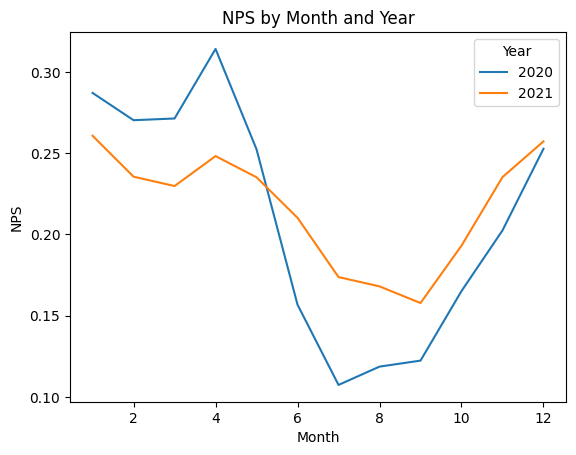

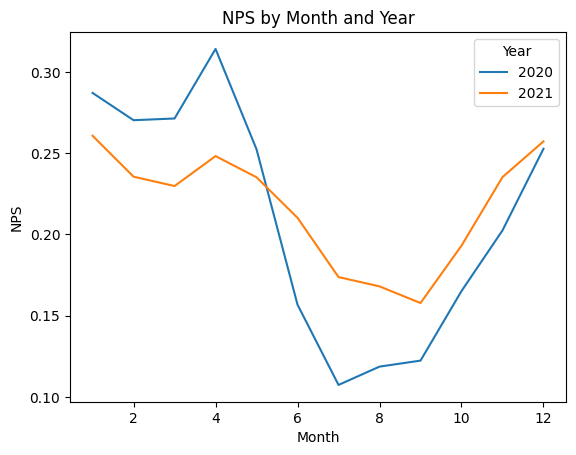

In [10]:

from telegram import ReplyKeyboardMarkup, KeyboardButton

@bot.message_handler(commands=['start', 'help'])
def send_welcome(message):
    if message.from_user.id != bot.get_me().id:
        markup = ReplyKeyboardMarkup(row_width=2)
        item1 = KeyboardButton('/hello')
        item2 = KeyboardButton('/plot')
        item2 = KeyboardButton('/inf')
        markup.add(item1, item2)
        bot.send_message(chat_id=message.chat.id, text="Привет!", reply_markup=markup)

@bot.message_handler(commands=['hello', 'inf'])
def send_hello(message):
    if message.from_user.id != bot.get_me().id:
        t = "Good day to you too!" # Заменили данные на сообщение приветствия
        t_str = str(t)
        # Send the message to the user
        bot.send_message(chat_id=message.chat.id, text=t_str)

@bot.message_handler(commands=['plot'])
def send_plot(message):
    if message.from_user.id != bot.get_me().id:
        # Создаем данные для графика       
# построение графика
        df['create_month'] = pd.to_datetime(df['create_month'])
        df['year'] = df['create_month'].dt.year
        df['month'] = df['create_month'].dt.month
        df_pivot = df.pivot_table(index='month', columns='year', values='nps')
        df_pivot.plot()
        # настройка осей и легенды
        plt.xlabel('Month')
        plt.ylabel('NPS')
        plt.title('NPS by Month and Year')
        plt.legend(title='Year')
        # Сохраняем график в объект io.BytesIO
        plot_object = io.BytesIO()
        plt.savefig(plot_object)
        plot_object.seek(0) 
        # Отправляем график через бота
        bot.send_photo(chat_id=message.chat.id, photo=plot_object)
# Запускаем процесс диспетчеризации
bot.polling()

In [ ]:
бэк
# Добавляем обработчики команд
@bot.message_handler(commands=['start', 'help'])
def send_welcome(message):
    if message.from_user.id != bot.get_me().id:
        bot.reply_to(message, "Привет!")

@bot.message_handler(commands=['hello'])
def send_hello(message):
    if message.from_user.id != bot.get_me().id:
        t = "Good day to you too!" # Заменили данные на сообщение приветствия
        t_str = str(t)
        # Send the message to the user
        bot.send_message(chat_id=message.chat.id, text=t_str)

@bot.message_handler(commands=['plot'])
def send_plot(message):
    if message.from_user.id != bot.get_me().id:
        # Создаем данные для графика       
# построение графика
        df['create_month'] = pd.to_datetime(df['create_month'])
        df['year'] = df['create_month'].dt.year
        df['month'] = df['create_month'].dt.month
        df_pivot = df.pivot_table(index='month', columns='year', values='nps')
        df_pivot.plot()
        # настройка осей и легенды
        plt.xlabel('Month')
        plt.ylabel('NPS')
        plt.title('NPS by Month and Year')
        plt.legend(title='Year')
        # Сохраняем график в объект io.BytesIO
        plot_object = io.BytesIO()
        plt.savefig(plot_object)
        plot_object.seek(0) 
        # Отправляем график через бота
        bot.send_photo(chat_id=message.chat.id, photo=plot_object)
# Запускаем процесс диспетчеризации
bot.polling()

In [19]:
subscribers = bot.get_updates()

if subscribers:
    test = 'Hello, subscribers!'
    for subscriber in subscribers:
        try:
            user_id = subscriber.message.chat.id
            bot.send_message(chat_id=user_id, text=test)
            print('Сообщение отправлено пользователю с id:', user_id)
        except Exception as e:
            print('Не удалось отправить сообщение пользователю с id:', user_id)
            print('Ошибка:', e)
else:
    print('Нет подписчиков')

Нет подписчиков


In [4]:
updates = bot.get_updates()
for update in updates:
    if update.message.reply_to_message:  # если текущее сообщение является ответом на другое сообщение
        user = update.message.from_user  # получаем пользователя, которому отправлено сообщение
        message = update.message.text  # получаем текст сообщения
        print(f"Пользователю {user.full_name} отправлено сообщение: {message}")

In [ ]:
#https://thecode.media/front-back/?utm_source=telegram&utm_medium=social&utm_campaign=post
# импортируем библиотеку telebot для работы с Telegram API
import telebot
# указываем токен для доступа к боту
# создаем объект бота с токеном, полученным через @BotFather в Telegram
bot = telebot.TeleBot('6303830366:AAGCHlbcOgB4vNruHvK8H-3c98YlgVMuLis')
# приветственный текст(создаем переменную с приветственным текстом, который будет отправляться при команде /start)
start_txt = 'Привет! Это журнал «Код». \n\nТеперь у бота появился бэкенд.'
# обрабатываем старт бота
@bot.message_handler(commands=['start']) # (декоратор, который определяет обработчик команды /start)
def start(message): #( функция обработки команды /start)
    # выводим приветственное сообщение
    bot.send_message(message.from_user.id, start_txt, parse_mode='Markdown') #(отправляем приветственное сообщение пользователю, указав его id, текст сообщения и форматирование Markdown)
# запускаем бота (— проверяем, запущен ли код как основная программа (не импортируется ли как модуль))

if __name__ == '__main__': 
    while True:
        # в бесконечном цикле постоянно опрашиваем бота — есть ли новые сообщения
        try:
            bot.polling(none_stop=True, interval=0) #(пытаемся опрашивать Telegram на наличие новых сообщений)
        # если возникла ошибка — сообщаем про исключение и продолжаем работу
        except Exception as e: 
            print('❌❌❌❌❌ Сработало исключение! ❌❌❌❌❌') #(если произошла какая-то ошибка, мы ее перехватываем и выводим в консоль, но продолжаем работу бота)